# Metody Obliczeniowe w Nauce i Technice Laboratorium 3
## Singular Value Decomposition
### Błażej Kustra

In [454]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [16, 8]

### Zadanie 1 Przekształcenie sfery w elipsoidę
#### 1. Korzystając z równania parametrycznego narysuj sferę jednostkową w 3D

$$ \textbf{v} = \begin{bmatrix}cos(s)sin(t) \\\ sin(s)sin(t) \\\ cos(t)\end{bmatrix}   $$

$$s \in [0, 2\pi], t \in [0, \pi]$$

In [455]:
def draw_sphere(n):
    s = np.linspace(0, 2 * np.pi, n)
    t = np.linspace(0, np.pi, n)

    ss, tt = np.meshgrid(s,t)

    x = np.cos(ss) * np.sin(tt)
    y = np.sin(ss) * np.sin(tt)  
    z = np.cos(tt)
    
    fig = plt.figure()
    ax = fig.add_subplot(121, projection='3d')
    
    ax.plot_surface(x, y, z, alpha=0.666, linewidth=0.420, facecolors=plt.cm.rainbow(z)).set_edgecolor('k')

    return x, y, z

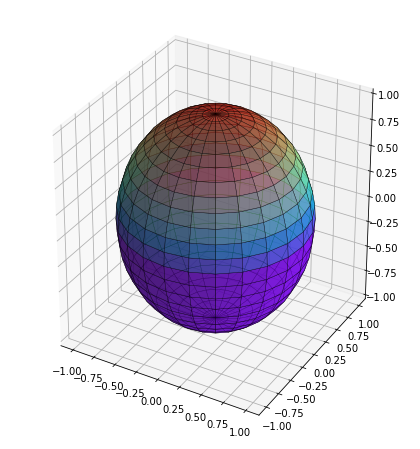

In [456]:
x, y, z = draw_sphere(25)

#### 2. Wygeneruj 3 różne macierze $A1,A2,A3$ gdzie (${A_i} ∈ R 3×3$), za ich pomocą dokonaj przekształcenia sfery w elipsoidę, a następnie przedstaw wizualizację uzyskanego wyniku.

In [290]:
A1 = np.random.rand(3, 3)
A2 = np.random.rand(3, 3)
A3 = np.random.rand(3, 3)

In [457]:
def sphere_to_elipsoid(x, y, z, A):
    
    x_elipsoid = np.zeros_like(x)
    y_elipsoid = np.zeros_like(y)
    z_elipsoid = np.zeros_like(z)

    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            vector = A @ np.array([x[i,j], y[i,j], z[i,j]])
            x_elipsoid[i,j] = vector[0]
            y_elipsoid[i,j] = vector[1]
            z_elipsoid[i,j] = vector[2]
    
    fig = plt.figure()
    ax = fig.add_subplot(121, projection='3d')   
    ax.plot_surface(x_elipsoid, y_elipsoid, z_elipsoid,
                    alpha=0.666, linewidth=0.420, facecolors=plt.cm.rainbow(z)).set_edgecolor('k')
    
    return [x_elipsoid, y_elipsoid, z_elipsoid]

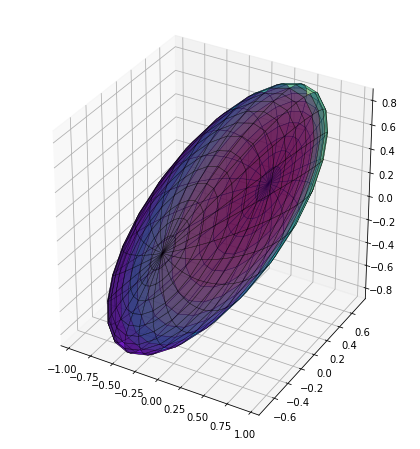

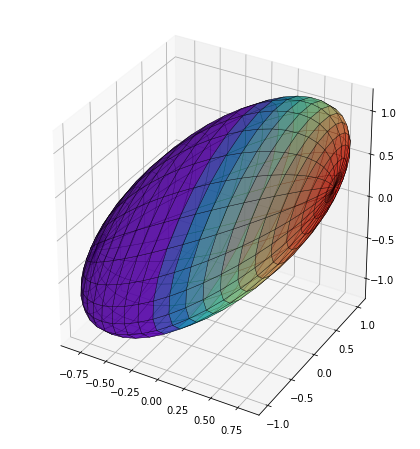

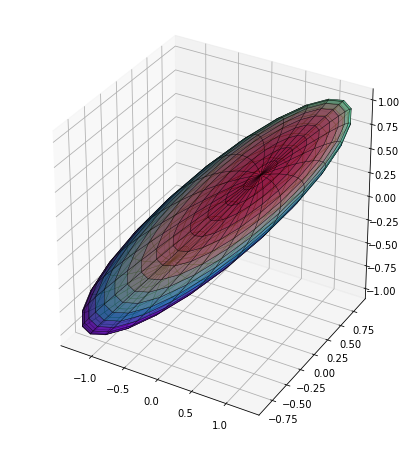

In [458]:
E1 = sphere_to_elipsoid(x, y, z, A1)
E2 = sphere_to_elipsoid(x, y, z, A2)
E3 = sphere_to_elipsoid(x, y, z, A3)

#### 3. Dokonaj rozkładu według wartości osobliwych (SVD) każdej macierzy ${A_i}$. Na wykresie elipsoidy odpowiadającej przekształceniu ${A_i}$ dodaj wizualizację jej półosi wyznaczonych za pomocą SVD.

In [459]:
u1, d1, v1 = np.linalg.svd(A1)
u2, d2, v2 = np.linalg.svd(A2)
u3, d3, v3 = np.linalg.svd(A3)

In [485]:
def draw_svd(U, D, E):
    fig = plt.figure()
    ax = fig.add_subplot(121, projection='3d')
    ax.plot_surface(E[0], E[1], E[2], alpha=0.666, linewidth=0.420, facecolors=plt.cm.rainbow(z)).set_edgecolor('k')
    
    for _, (d, color) in enumerate(zip(np.diag(D), ['r','b','g'])):
        vector = np.dot(U, d)
    
        ax.plot([0, vector[0]], [0, vector[1]], [0, vector[2]], linewidth=3, zorder=3, color=color)

[[-0.58449096  0.78720604 -0.1966646 ]
 [-0.46817685 -0.5251545  -0.71064983]
 [-0.66270714 -0.32329459  0.67549971]]
[1.24462733 0.         0.        ]
[-0.72747342 -0.5827057  -0.82482342]
[[-0.58449096  0.78720604 -0.1966646 ]
 [-0.46817685 -0.5251545  -0.71064983]
 [-0.66270714 -0.32329459  0.67549971]]
[0.         0.78279338 0.        ]
[ 0.61621968 -0.41108747 -0.25307286]
[[-0.58449096  0.78720604 -0.1966646 ]
 [-0.46817685 -0.5251545  -0.71064983]
 [-0.66270714 -0.32329459  0.67549971]]
[0.         0.         0.11359714]
[-0.02234054 -0.08072779  0.07673484]
0.6162196768080153


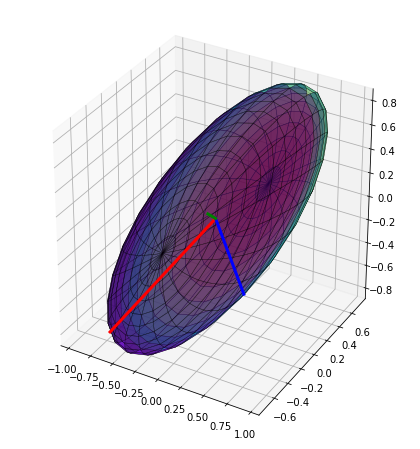

In [487]:
draw_svd(u1, d1, E1)

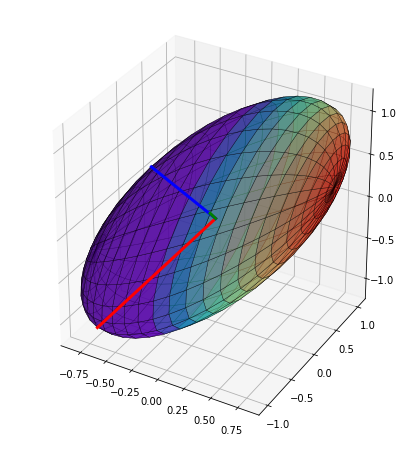

In [477]:
draw_svd(u2,d2,E2)

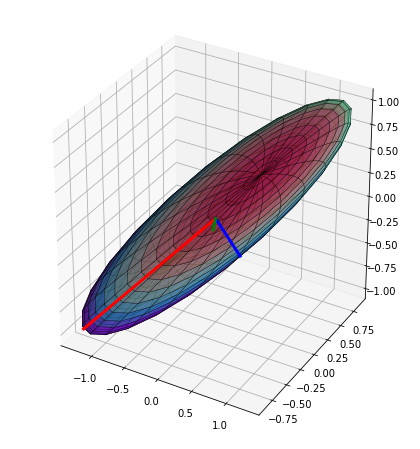

In [478]:
draw_svd(u3,d3,E3)

#### 4. Znajdź taką macierz ${A_i}$, aby stosunek jej największej i najmniejszej wartości osobliwej był większy od 100. Narysuj odpowiadającą jej elipsoidę.

In [465]:
def find_svd():
    result = np.random.rand(3, 3)
    U, D, V = np.linalg.svd(result)
    
    while D[0] / D[-1] < 100:
        result = np.random.rand(3, 3)
        U, D, V = np.linalg.svd(result)
        
    return result

[[0.37811483 0.54620983 0.31253418]
 [0.96133717 0.58662352 0.84380861]
 [0.66864124 0.62267026 0.56214852]]


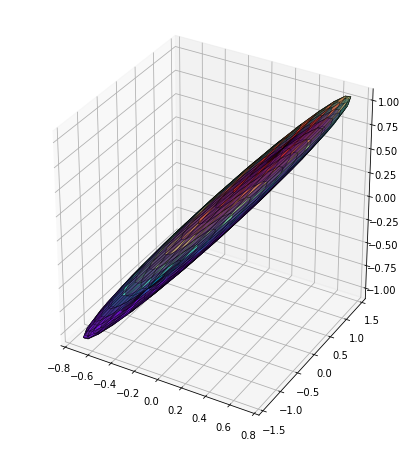

In [466]:
result = find_svd()
print(result)
_ = sphere_to_elipsoid(x, y, z, result)

#### 5. Dla wybranej macierzy ${A_i}$ przedstaw wizualizacje $S{V_i}^T, S{Σ_i}{V_i}^T$ oraz $S{U_i}{Σ_i}{V_i}^T$ , gdzie ${A_i} = {U_i}{Σ_i}{V_i}^T$ a S oznacza sferę z punktu 1.

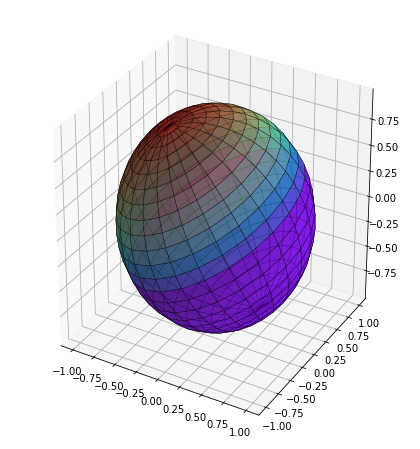

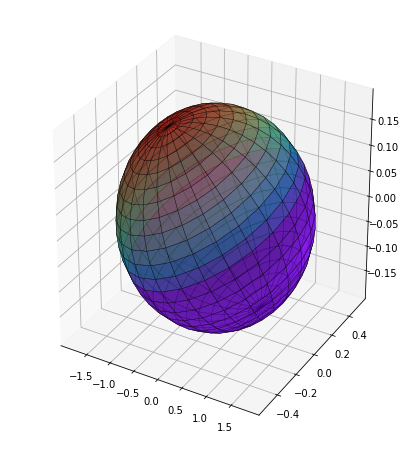

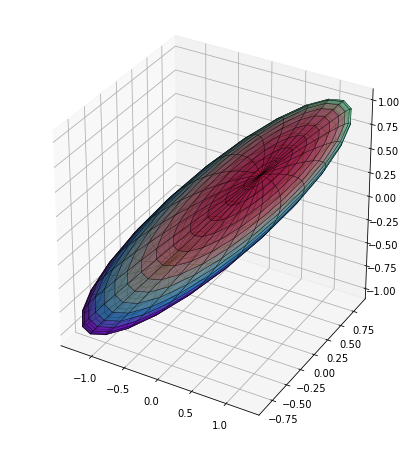

In [406]:
U,D,V = np.linalg.svd(A3)

_ = sphere_to_elipsoid(x, y, z, V)
_ = sphere_to_elipsoid(x, y, z, np.diag(D) @ V)
_ = sphere_to_elipsoid(x, y, z, U @ np.diag(D) @ V)

### Zadanie 2 Kompresja obrazu
#### 1. Przygotuj przykładowe zdjęcie o rozmiarze 512 × 512 pikseli (np. Lenna image)

<img src="lena512.jpg">

#### 2. Oblicz SVD macierzy pikseli I, a następnie dokonaj przybliżenia tej macierzy za pomocą low rank approximation (k pierwszych wartości osobliwych) uzyskując kompresję obrazu wejściowego. $$I \simeq \sum_{i=1}^{k} {σ_i}{u_i}{v_i}^T$$ 


#### gdzie ${σ_i}$ jest i-tą wartością osobliwą macierzy I, ${u_i}$ jest lewym wektorem osobliwym, a ${v_i}$ - prawym wektorem osobliwym.

In [509]:
import os
import numpy as np
from PIL import Image

def low_rank_approximation(filename):
    path, ext = os.path.splitext(filename)
    img = Image.open(filename)

    img = img.convert('LA')
    img = np.array(list(img.getdata(band=0)), float)
    img.shape = (512, 512)

    X = np.asarray(img)
    U, D, V = np.linalg.svd(X)
    
    for k in [10, 25, 40, 55, 70, 85,100]:
        img_k = U[:, :k] @ np.diag(D[:k]) @ V[:k, :]
        img_new = Image.fromarray(np.uint8(img_k))
        img_new.save(path + '-' + str(k) + ext)
        print("zapisuje",k)


low_rank_approximation("lena512.jpg")

zapisuje 10
zapisuje 25
zapisuje 40
zapisuje 55
zapisuje 70
zapisuje 85
zapisuje 100


<img src="lena512-10.jpg">
<center><b>k = 10</b></center>

<img src="lena512-25.jpg">
<center><b>k = 25</b></center>

<img src="lena512-40.jpg">
<center><b>k = 40</b></center>

<img src="lena512-55.jpg">
<center><b>k = 55</b></center>

<img src="lena512-70.jpg">
<center><b>k = 70</b></center>

<img src="lena512-85.jpg">
<center><b>k = 85</b></center>

<img src="lena512-100.jpg">
<center><b>k = 100</b></center>